In [ ]:
# Import dependencies

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
df = pd.read_csv('./Data/clean_data.csv')

In [3]:
# Display header to get a sense of look and feel
df.head(2)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month,inpatient__occupancy,percent_of_inpatients_with_covid
0,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.1512
1,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.1512


In [4]:
#Define Month Grouping
grp_stats = df.groupby(['month'])

grp_stats.count().head(2)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,inpatient__occupancy,percent_of_inpatients_with_covid
month,,,,,,,,,,,,,
1,16,16,16,16,16,16,16,16,16,16,16,16,16
2,70,70,70,70,70,70,70,70,70,70,70,70,70


In [5]:
#Calculate Death & Covid inpatients Stats per month

# count on number of cases reported
cnt_reported = grp_stats["cdc_report_dt"].count()

# Total Population Count
totalcnt = len(df)

# Sum on Death 
sum_dth = grp_stats["death_yn"].sum()

#Death Count per Case Count
dth_cnt_per_cs_cnt = sum_dth/cnt_reported

#Create month array for plotting
month_list = df['month'].unique()
month_list.sort()


In [6]:
#Create a dataframe to enable statistical regression and plotting
grp_stats_df = pd.DataFrame({"Case Count Reported" : cnt_reported,
                             "Death Count Reported" : sum_dth,
                             "Death % of Case Count" :dth_cnt_per_cs_cnt,                                                     
                             })
grp_stats_df

,Case Count Reported,Death Count Reported,Death % of Case Count
month,,,
1,16,0.0,0.000000
2,70,16.0,0.228571
3,11231,2925.0,0.260440
4,32490,5574.0,0.171560
5,35517,3374.0,0.094997
6,49884,8381.0,0.168010
7,63765,2524.0,0.039583
8,63043,2057.0,0.032629
9,53365,1395.0,0.026141


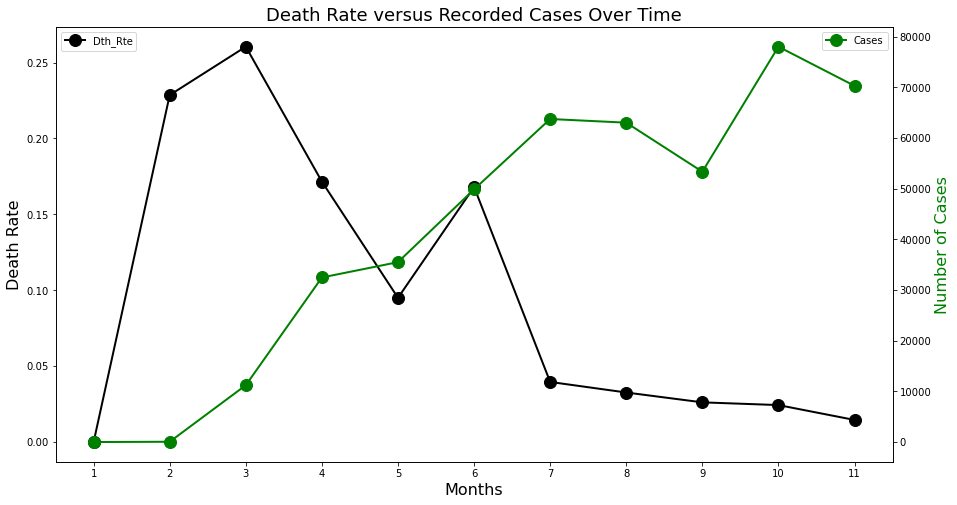

In [57]:
# Generate a line plot of death rate per recorded case over time

#Define plot components
x_axis = month_list
dth_pct_case_cnt = grp_stats_df["Death % of Case Count"]
cse_cnt_rptd = grp_stats_df["Case Count Reported"]


#Charactorize figure size/layout                       
fig = plt.figure(figsize=(15, 8))

#Build and format plot 1
ax1 = fig.add_subplot(111)
ax1.plot(x_axis, dth_pct_case_cnt, linewidth=2, markersize=12,marker="o",color="black", label = "Dth_Rte")
plt.xlabel('Months',fontsize =16)
plt.ylabel('Death Rate',fontsize =16)
plt.legend(loc='upper left')

#Build and format plot 2
ax2=ax1.twinx()
ax2.plot(x_axis, cse_cnt_rptd, linewidth=2, markersize=12,marker="o",color="green", label = "Cases")
plt.legend(loc='upper right')
plt.ylabel('Number of Cases',color="green",fontsize =16)

#define title and Lable axis
plt.title('Death Rate versus Recorded Cases Over Time',fontsize =18)

plt.xticks(x_axis)

#Establish plot limits
#plt.ylim(-.02, .3)

#Save image for potential reference in the report
plt.savefig("./Images/Plots/dth_rte_per_recorded_case_over_time", bbox_inches = "tight")

plt.show()


In [8]:
#Define age grouping 11th month only
df_11 = df.loc[df["month"] == 11,:]

grp_age_stats = df_11.groupby(['age_group','month'])

grp_age_stats.count().head(2)

,,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,inpatient__occupancy,percent_of_inpatients_with_covid
age_group,month,,,,,,,,,,,,
0 - 9 Years,11,2832,2832,2832,2832,2832,2832,2832,2832,2832,2832,2832,2832
10 - 19 Years,11,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094,8094


In [11]:
#Age Calculations
# Sum on Death 
sum_age_dth = grp_age_stats["death_yn"].sum()


In [10]:
#Create a dataframe to enable statistical regression and plotting
grp_stats_age_df = pd.DataFrame({"Age at Death" : sum_age_dth                             
                             })
grp_stats_age_df

,,Age at Death
age_group,month,
0 - 9 Years,11,4.0
10 - 19 Years,11,14.0
20 - 29 Years,11,14.0
30 - 39 Years,11,26.0
40 - 49 Years,11,38.0
50 - 59 Years,11,53.0
60 - 69 Years,11,161.0
70 - 79 Years,11,258.0
80+ Years,11,455.0


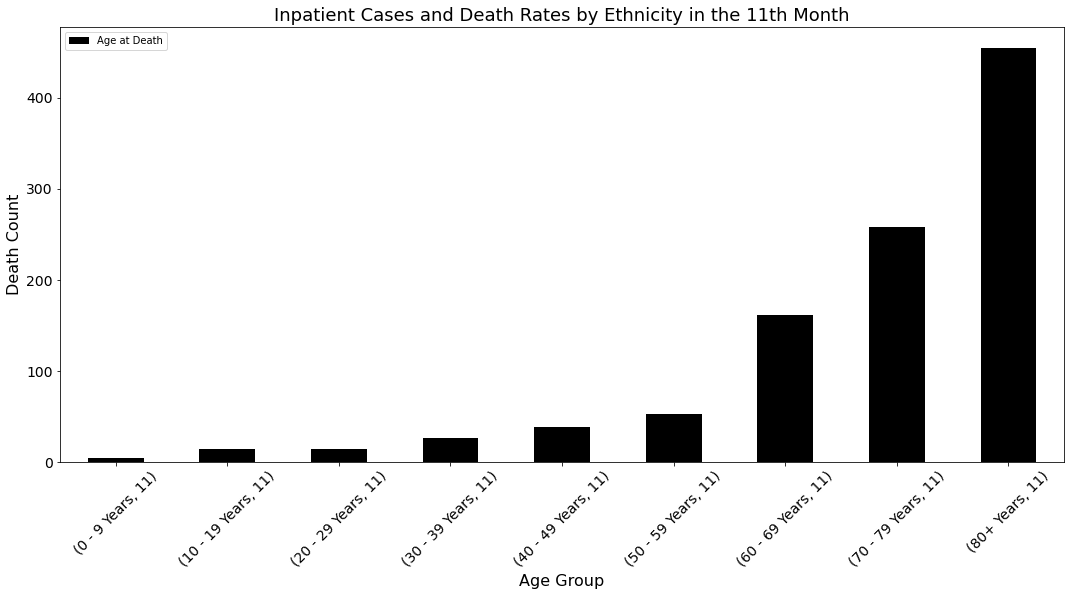

In [60]:
# Generate a bar plot showing the Inpatient Cases and Death Rates by Ethnicity in the 11th Month

#Plot Chart

measure_plot = grp_stats_age_df.plot.bar(figsize=(18,8), color= ['black'],fontsize = 14)
plt.xlabel("Age Group",fontsize = 16)
plt.ylabel("Death Count",fontsize = 16)
plt.title("Inpatient Cases and Death Rates by Ethnicity in the 11th Month",fontsize = 18)
plt.xticks(rotation=45)


#Save image for potential reference in the report
plt.savefig("./Images/Plots/dth_cnt_by_age_grp_plot_by_mnth.png")

plt.show()

In [33]:
#Define Ethnic grouping 11th month only
df_11 = df.loc[df["month"] == 11,:]

grp_ethnic_stats = df_11.groupby(['Race and ethnicity (combined)','month'])

grp_ethnic_stats.count().head(2)

,,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,inpatient__occupancy,percent_of_inpatients_with_covid
Race and ethnicity (combined),month,,,,,,,,,,,,
Asian,11,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483
Black,11,5614,5614,5614,5614,5614,5614,5614,5614,5614,5614,5614,5614


In [34]:
#Age Calculations
# Sum on Death 
sum_ethnic_dth = grp_ethnic_stats["death_yn"].sum()

#Count of reported
cnt_ethnic_rptd = grp_ethnic_stats["cdc_report_dt"].count()

#Ratio of death to reported
dth_rate_by_ethnicity = sum_ethnic_dth/cnt_ethnic_rptd

In [43]:
#Create a dataframe to enable statistical regression and plotting
grp_stats_ethnic_df = pd.DataFrame({"Cases Reported":cnt_ethnic_rptd,
                                    "Pct of Reported Dying":dth_rate_by_ethnicity                                    
                             })
grp_stats_ethnic_df

,,Cases Reported,Pct of Reported Dying
Race and ethnicity (combined),month,,
Asian,11,1483,0.008766
Black,11,5614,0.016922
Hispanic,11,10413,0.005954
Native,11,187,0.021390
Other,11,2097,0.017167
Pacific Islander,11,313,0.009585
White,11,50205,0.016134


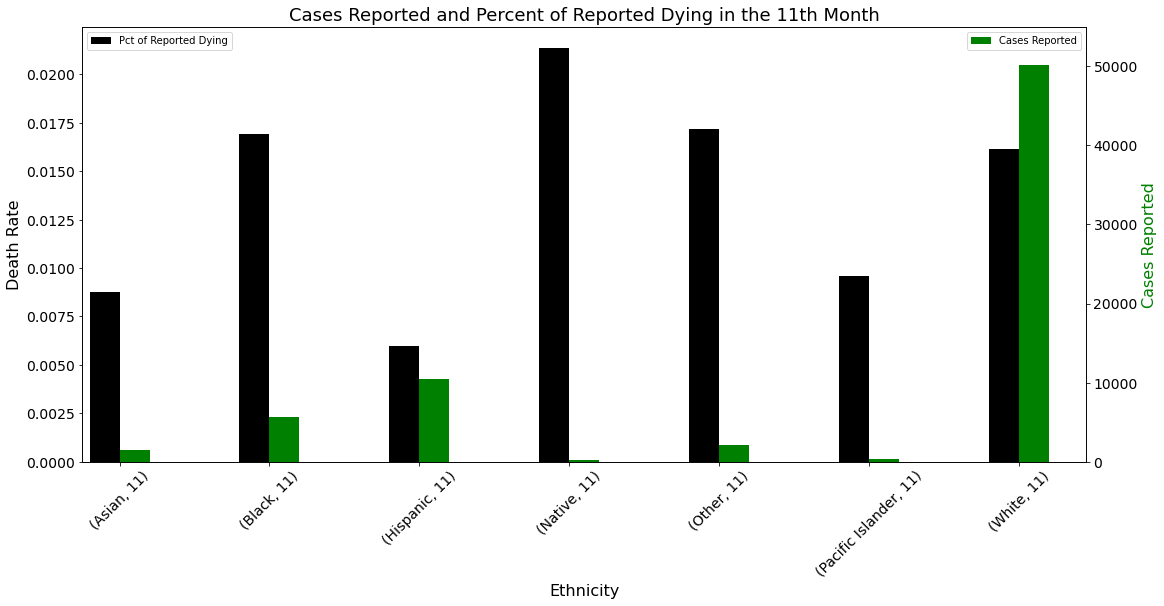

In [61]:
# Generate a bar plot showing the cases reported and percent of reported dying

#Plot Chart
fig = plt.figure(figsize=(15, 8))

width=0.2

#Build and format plot 1
ax1 = fig.add_subplot(111)
grp_stats_ethnic_df['Pct of Reported Dying'].plot.bar(figsize=(18,8), color= ['black'],fontsize = 14, position=1,width=width)
plt.xlabel('Ethnicity',fontsize =16)
plt.ylabel('Death Rate',fontsize =16)
plt.legend(loc='upper left')
plt.xticks(rotation=45)

#Build and format plot 2
ax2=ax1.twinx()
grp_stats_ethnic_df['Cases Reported'].plot.bar(figsize=(18,8), color= ['green'],fontsize = 14, position=0,width=width)
plt.legend(loc='upper right')
plt.ylabel('Cases Reported',color="green",fontsize =16)
plt.ylim(0, 55000)

#define title and Lable axis
plt.title("Cases Reported and Percent of Reported Dying in the 11th Month",fontsize = 18)



#Save image for potential reference in the report
plt.savefig("./Images/Plots/cases_rptd_and_pct_rptd_dth_by_ethnic_grp.png")

plt.show()